In [47]:
! pip install pyforest 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:
    

In [48]:
#Q1)
import pyforest
df=pd.read_csv("diabetes.csv")
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
import warnings
warnings.filterwarnings('ignore')
df.shape

(768, 9)

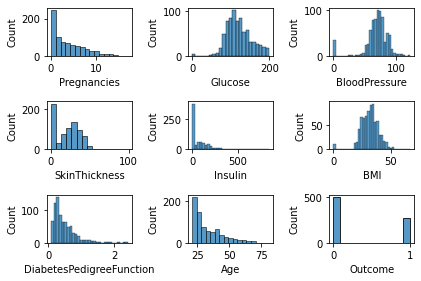

In [52]:
plotno=1
plt.plot(figsize=(20,10))
for i in df.columns:
    if plotno<=10:
        plt.subplot(3,3,plotno)
        sns.histplot(df[i])
        plt.xlabel(i)
    plotno+=1
plt.tight_layout()
plt.show()

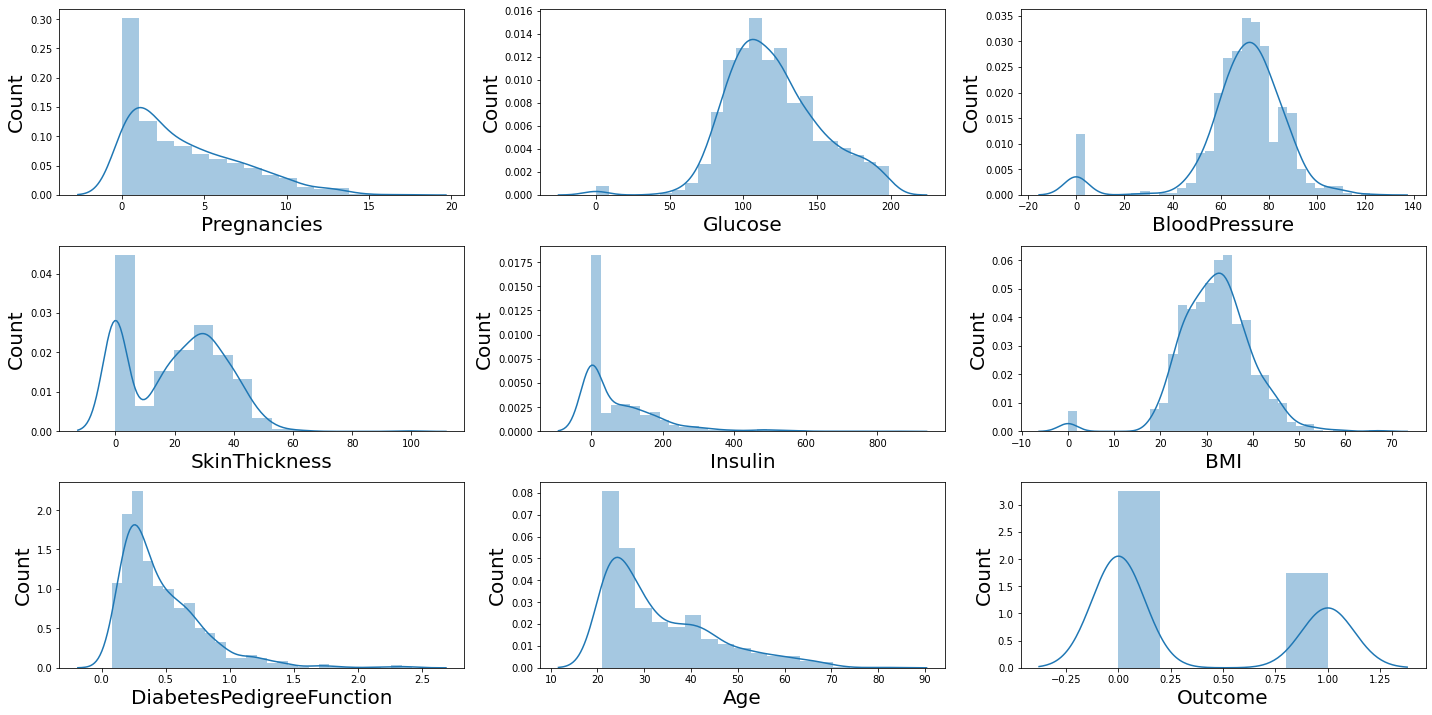

In [53]:
plt.figure(figsize=(20, 10), facecolor='white')
plotnumber = 1

for i in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

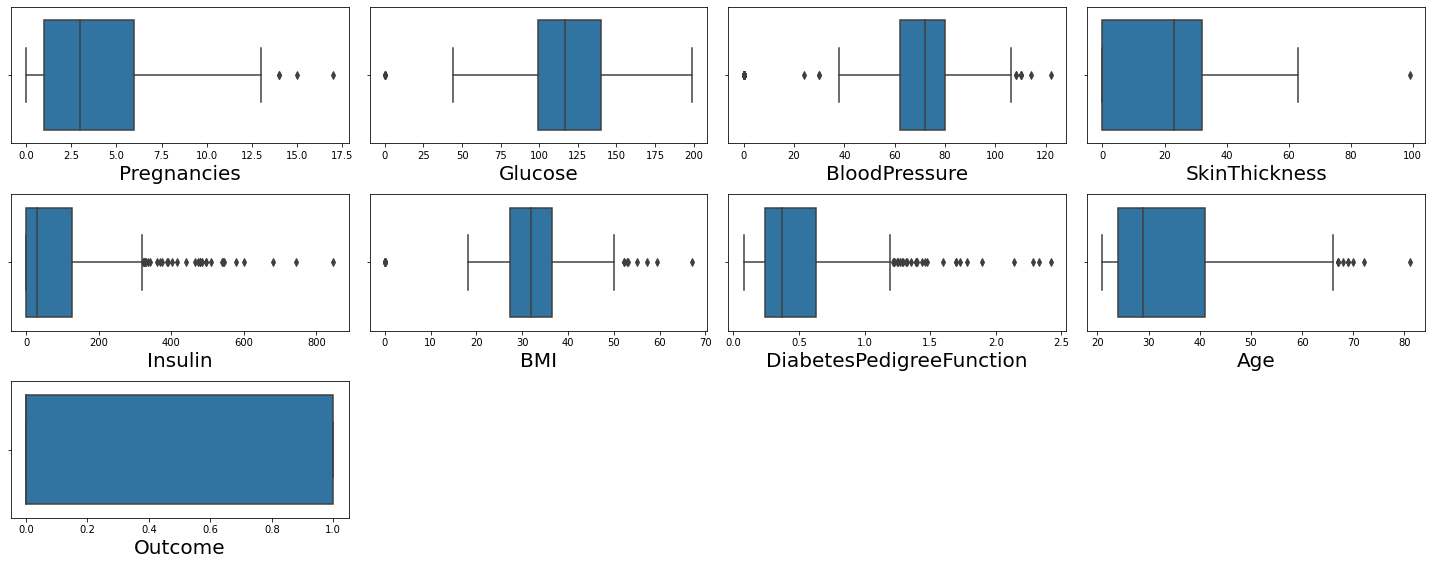

In [54]:
plt.figure(figsize=(20, 10), facecolor='white')
plotnumber = 1

for i in df.columns:
    if plotnumber <= 20:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [55]:
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = data[np.abs(z_scores) > threshold]
    data_cleaned = data[np.abs(z_scores) <= threshold]
    return data_cleaned, outliers

# Dictionary to store outliers for each column
outliers_dict = {}

# Loop through the numeric columns and detect/remove outliers
for column in numeric_columns:
    heart_disease_data, outliers = remove_outliers_zscore(df, column)
    outliers_dict[column] = outliers

# Print the outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print()

# Updated dataset after removing outliers
print("Heart disease dataset after removing outliers:")
heart_disease_data


NameError: name 'numeric_columns' is not defined

In [ ]:
sns.pairplot(df.drop('Outcome',axis=1))

In [ ]:
#Q2)
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = data[np.abs(z_scores) > threshold]
    data_cleaned = data[np.abs(z_scores) <= threshold]
    return data_cleaned, outliers


outliers_dict = {}
for column in df.drop('Outcome',axis=1).columns:
    diabetes_data, outliers = remove_outliers_zscore(df, column)
    outliers_dict[column] = outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print()
print("Diabestes dataset after removing outliers:")
diabetes_data


In [ ]:
data=diabetes_data

In [ ]:
plt.figure(figsize=(20, 10), facecolor='white')
plotnumber = 1

for i in data.columns:
    if plotnumber <= 20:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
##Q3
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
##Q4)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt_classifier = DecisionTreeClassifier()
params = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(dt_classifier, params, cv=5)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_


In [ ]:
#Q5)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_prob = best_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


In [ ]:
#Q6)
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_classifier, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()